In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
import pylab
from typing import Tuple
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.io import imread, imshow

In [87]:
image = imread('parrots.jpg')
w, h, d = image.shape

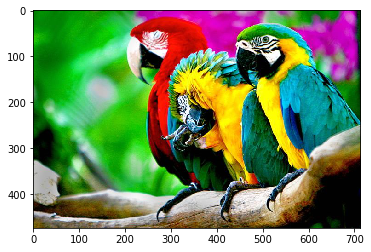

In [88]:
pylab.imshow(image)
w, h, d = image.shape
img_float = img_as_float(image)
r = img_float[:,:,0].ravel()
g = img_float[:,:,1].ravel()
b = img_float[:,:,2].ravel()
rgb = np.transpose(np.vstack((r,g,b)))

pixels = pd.DataFrame(np.reshape(img_float, (w*h, d)), columns=["R", "G", "B"])


In [58]:
pixels.head()

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


In [59]:
clf = KMeans(init='k-means++', random_state=241)

In [60]:
clf.fit(rgb)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=241, tol=0.0001, verbose=0)

In [82]:
clf.cluster_centers_

array([[0.05446792, 0.11710688, 0.05055082],
       [0.45210969, 0.6652273 , 0.44049523],
       [0.61416077, 0.21372858, 0.06257684],
       [0.09573358, 0.63583673, 0.06693434],
       [0.95430314, 0.82769239, 0.0410585 ],
       [0.78734433, 0.8231661 , 0.79772078],
       [0.77710122, 0.09089143, 0.69027797],
       [0.04567179, 0.55193243, 0.59913958]])

In [61]:
clf.n_clusters

8

In [65]:
img_new = np.copy(img_float)

In [66]:
img_new[0]

array([[0.01568627, 0.49411765, 0.01960784],
       [0.00784314, 0.49411765, 0.00784314],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.        , 0.21960784, 0.00784314],
       [0.        , 0.20784314, 0.03137255],
       [0.00784314, 0.21568627, 0.04313725]])

In [62]:
def cluster_pixels(pixels: pd.DataFrame, n_clusters: int=8):
    pixels = pixels.copy()

    model = KMeans(n_clusters=n_clusters, init="k-means++", random_state=241)
    pixels["cluster"] = model.fit_predict(pixels)
    return pixels

def show_images(mean_image: np.array, median_image: np.array) -> None:
    fig=plt.figure()

    ax = fig.add_subplot(1, 2, 1)
    ax.title.set_text("Mean image")
    imshow(mean_image)

    ax = fig.add_subplot(1, 2, 2)
    ax.title.set_text("Median image")
    imshow(median_image)
    
    plt.show()

In [8]:
pixels["cluster"] = clf.fit_predict(pixels)

NameError: name 'clf' is not defined

In [100]:
means = pixels.groupby("cluster").mean().reset_index()
median = pixels.groupby("cluster").median().reset_index()
pixels_mean = pixels.merge(means, left_on='cluster', right_on='cluster').drop(['R_x','G_x','B_x'], axis = 1)
pixels_median = pixels.merge(median, left_on='cluster', right_on='cluster').drop(['R_x','G_x','B_x'], axis = 1)


In [78]:
def psnr(pic1: np.array, pic2: np.array) -> float:
    pic1 = np.reshape(np.array(pic1), (w, h , d))
    pic2 = np.reshape(np.array(pic2), (w, h , d))
    mse = np.mean((pic1-pic2)**2)
    return 10*np.log10(1 / mse)
    

In [43]:
def shape_pic_reverse (pic):
    pic = pd.DataFrame(np.reshape(pic, (w*h, d)), columns=["R", "G", "B"])
    return pic

def shape_pic_reverse_back(pic):
    pic = np.array(pic)
    pic = np.reshape(pic, (w,h,d))
    return pic

In [21]:
def model_clust(n_clusters,pic):
    model = KMeans(n_clusters=n_clusters, init="k-means++", random_state=241)  
    model.fit(pic)
    return model

In [ ]:
def mean_median(pic,model):
    pic['cluster'] = model.fit_predict(pic)
    means = pic.groupby("cluster").mean().reset_index()
    median = pic.groupby("cluster").median().reset_index()
    pic_mean = pic.merge(means, how = 'left',  left_on='cluster', right_on='cluster').drop(['R_x','G_x','B_x','cluster'], axis = 1)
    pic_median = pic.merge(median, how = 'left', left_on='cluster', right_on='cluster').drop(['R_x','G_x','B_x','cluster'], axis = 1)   
    return(pic_mean, pic_median)

def column(pic):
    pic.columns = ['R','G','B']
    return pic

In [47]:
def psnr(pic1,pic2):
    mse = np.mean((pic1-pic2)**2)
    return 10*np.log10(1 / mse)

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


9.427840460507397


C:\Users\mmat9\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


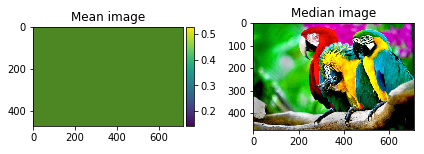

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


11.652035133497707


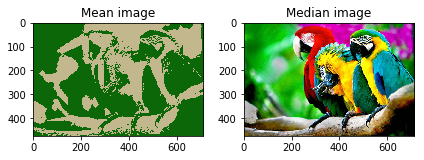

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


12.788262298367108


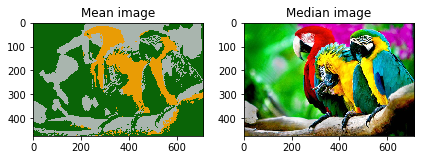

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


14.002869083995515


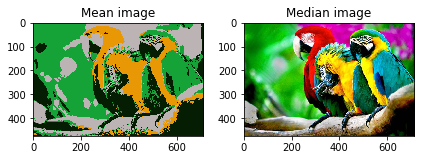

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


15.182645301370776


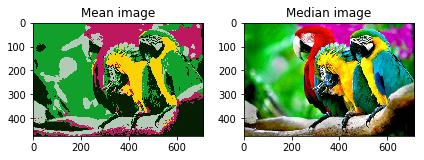

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


16.050654699030062


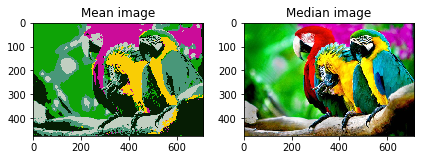

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


17.33638299814902


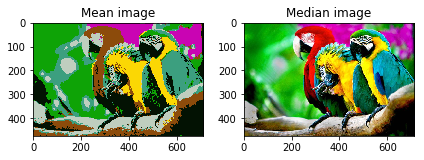

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


18.136790628476295


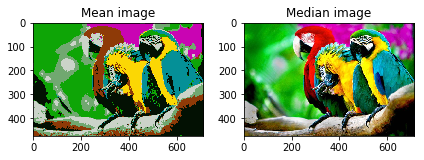

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


18.815530755112988


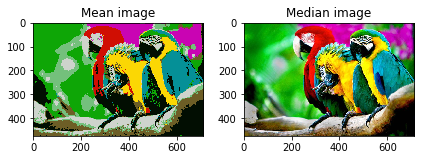

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


19.4142631075596


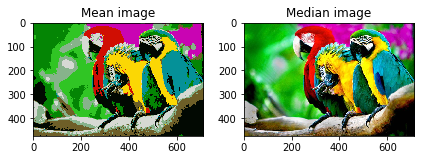

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


19.844475901876958


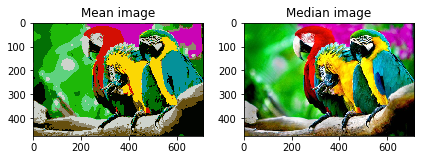

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


20.306433969484033


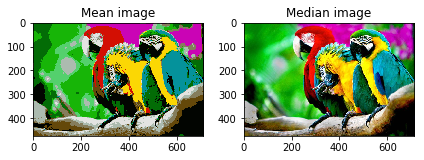

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


20.791690720880787


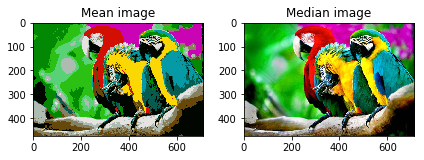

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


21.12405111776821


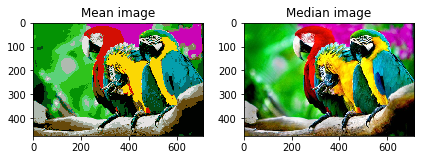

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


21.403766532452593


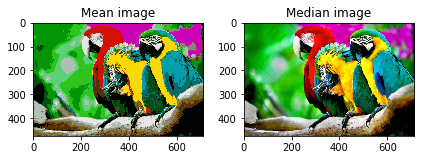

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


21.643695709129915


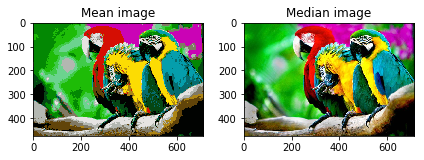

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


21.92407274860753


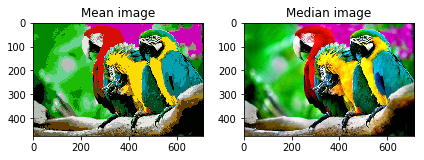

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


22.1273523045926


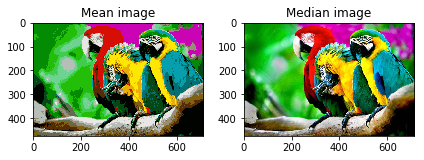

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


22.33205953023688


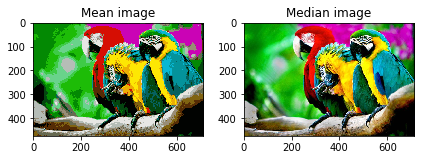

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


22.570095002407932


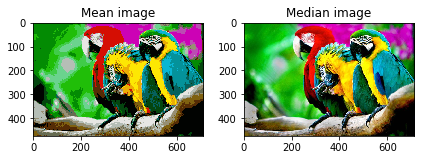

In [81]:
pic = imread('parrots.jpg')
w, h, d = pic.shape
pic_float = img_as_float(pic)
for clust in range(1,21):
    print(pic_float)
    pic_float = img_as_float(pic)
    pic_float = shape_pic_reverse(pic_float)
    clf = model_clust(clust,pic_float)
    print(pic_float)
    pic_float['cluster']= clf.fit_predict(pic_float)
    
    pic_float_mean, pic_float_median = mean_median_image(pic_float)
    pic_float = pic_float.drop(['cluster'], axis = 1)
    pic_float_mean, pic_float_median, pic_float = shape_pic_reverse_back(pic_float_mean),shape_pic_reverse_back(pic_float_median),shape_pic_reverse_back(pic_float)
    print (psnr(pic_float_median, pic_float))
    show_images(pic_float_median,pic_float)

In [ ]:
def mean_median_image(pixels: pd.DataFrame) -> Tuple[np.array, np.array]:
    means = pixels.groupby("cluster").mean().values
    mean_pixels = np.array([means[c] for c in pixels["cluster"]])
    mean_image = np.reshape(mean_pixels, (w, h, d))

    medians = pixels.groupby("cluster").median().values
    median_pixels = np.array([medians[c] for c in pixels["cluster"]])
    print(median_pixels)
    median_image = np.reshape(median_pixels, (w, h, d))
    print("вот",median_image.shape)
    return mean_image, median_image

In [76]:


for clust in range(1,21):
    print(1)
    pixels = pd.DataFrame(np.reshape(img_float, (w*h, d)), columns=["R", "G", "B"])
    model = KMeans(n_clusters=clust, init="k-means++", random_state=241)
    model.fit(pixels)
    pixels["cluster"] = model.fit_predict(pixels)
    means = pixels.groupby("cluster").mean().reset_index()
    median = pixels.groupby("cluster").median().reset_index()
    pixels_mean = pixels.merge(means,  left_on='cluster', right_on='cluster').drop(['R_x','G_x','B_x'], axis = 1)
    pixels_median = pixels.merge(median, left_on='cluster', right_on='cluster').drop(['R_x','G_x','B_x'], axis = 1)
    print(2)
    pixels = pixels.drop('cluster', axis = 1)
    pixels_mean = pixels_mean.drop('cluster', axis = 1)
    pixels_mean.columns= ['R','G','B']
    pixels_median = pixels_median.drop('cluster', axis = 1)
    pixels_median.columns= ['R','G','B']
    show_images(np.reshape(np.array(pixels_mean), (w, h , d)), np.reshape(np.array(pixels_median), (w, h , d)))
    if True:
        print("Кластеров:", clust)
        print(psnr(pixels, pixels_mean), psnr(pixels, pixels_median))
    
    
    

1


NameError: name 'img_float' is not defined

In [89]:
means.reset_index()

,cluster,R,G,B
0,0,0.054235,0.116828,0.050476
1,1,0.451770,0.665924,0.440720
2,2,0.613314,0.214179,0.063028
3,3,0.095611,0.635579,0.066848
4,4,0.954266,0.827644,0.041095
5,5,0.787401,0.823102,0.797687
6,6,0.777000,0.091002,0.690209
7,7,0.045627,0.551740,0.599076


In [46]:
np.mean(np.mean((pixels-pixels_mean)**2))

0.20096644641733633

In [80]:
def mean_median_image(pixels: pd.DataFrame) -> Tuple[np.array, np.array]:
    print("cdsvdfv", pixels)
    means = pixels.groupby("cluster").mean().values
    print("раз",means,means.shape)
    mean_pixels = np.array([means[c] for c in pixels["cluster"]])
    print("два",mean_pixels, mean_pixels.shape)
    mean_image = np.reshape(mean_pixels, (w, h, d))
    print("три",mean_image, mean_image.shape)

    medians = pixels.groupby("cluster").median().values
    median_pixels = np.array([medians[c] for c in pixels["cluster"]])
    median_image = np.reshape(median_pixels, (w, h, d))

    return mean_image, median_image

In [62]:
 mean_image, median_image = mean_median_image(pixels)

In [64]:
mean_image.shape

(474, 713, 3)

In [61]:
pixels["cluster"] = clf.fit_predict(pixels)

In [77]:

np.reshape(np.array(pixels), (474, 713, 3))


array([[[0.01568627, 0.49411765, 0.01960784],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21960784, 0.00784314],
        [0.        , 0.20784314, 0.03137255],
        [0.00784314, 0.21568627, 0.04313725]],

       [[0.01568627, 0.49411765, 0.01960784],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21176471, 0.00392157],
        [0.        , 0.20784314, 0.03137255],
        [0.        , 0.20392157, 0.03137255]],

       [[0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21176471, 0.00392157],
        [0.        , 0.20392157, 0.03137255],
        [0.        , 0.2       , 0.03137255]],

       ...,

       [[0.4745098 , 0.37647059, 0.01568627],
        [0.44705882, 0.35686275, 0.        ],
        [0.45098039, 0

In [76]:
np.array(pixels)

array([[0.01568627, 0.49411765, 0.01960784],
       [0.00784314, 0.49411765, 0.00784314],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.02352941, 0.09019608, 0.11764706],
       [0.08235294, 0.16078431, 0.20392157],
       [0.0745098 , 0.16470588, 0.23529412]])

In [3]:
a = np.array([1,2,3,4])

In [13]:
np.reshape(a,(2,2)).ravel()

array([1, 2, 3, 4])

In [12]:
np.reshape(a)

TypeError: reshape() missing 1 required positional argument: 'newshape'

In [73]:
np.array([means[c] for c in [1,2,3]])

NameError: name 'means' is not defined